We will plot the angle trace for the three longest whiskers (on each side if there are two sides)

In [1]:
import os
import cv2
import tables
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Navigate to the directory where the video and tracking data is stored
data_dir="E:/test/whisker_tracking"
video_name="whiskers.mp4"
video_file=os.path.join(data_dir,video_name)
os.chdir(data_dir)

In [3]:
# Open the HDF5 file and get the pixel data
h5file = tables.open_file(f'{os.path.basename(video_name).split(".")[0]}.hdf5', mode='r')

# Get the summary data
summary = h5file.get_node('/summary')

# Get unique whisker IDs
whisker_ids = np.unique(summary[:]['wid'])


In [8]:
# Get the table index for the first frame, with fid = 0 
first_frame_idx = np.where(summary[:]['fid'] == 0)[0]

# Get the index for the three longest whiskers in the first frame
longest_whiskers = np.argsort(summary[first_frame_idx]['length'])[-6:]

# Sort them by the follicle_y coordinate
longest_whiskers_idx = longest_whiskers[np.argsort(summary[first_frame_idx]['follicle_y'][longest_whiskers])]

# Get the wid for those whiskers
longest_whiskers_wid = summary[first_frame_idx]['wid'][longest_whiskers_idx]


In [9]:
longest_whiskers_wid

array([25, 27,  0, 26,  1,  2], dtype=uint16)

In [15]:
# Get the angle values for the longest whiskers

# Initialize l_angles as an empty list
l_angles = []
# Loop through the unique whisker IDs
for wid in longest_whiskers_wid:
    # Get the angle values for the current whisker ID
    w_angles = summary[summary[:]['wid'] == wid]['angle']
    # Append the angle values to the list of angles
    l_angles.append(w_angles)

# Second list comprehension: fill in the missing values with NaNs
# Get the length of the longest list of angles
max_len = max([len(l) for l in l_angles])
# Loop through the list of angles
for i in range(len(l_angles)):
    # Get the current list of angles
    w_angles = l_angles[i]
    # If the length of the current list of angles is less than the maximum length
    if len(w_angles) < max_len:
        # Append NaNs to the list of angles
        l_angles[i] = np.concatenate((w_angles, np.full(max_len - len(w_angles), np.nan)))


In [16]:
l_angles

[array([-101.17007 , -101.32617 , -100.01008 , ..., -100.05089 ,
        -100.088844,  -87.83824 ], dtype=float32),
 array([-91.97528076, -92.41440582, -86.22119904, ...,          nan,
                 nan,          nan]),
 array([78.09818268, 76.08693695, 73.86543274, ...,         nan,
                nan,         nan]),
 array([-90.26564789, -88.80154419, -91.13613129, ...,          nan,
                 nan,          nan]),
 array([65.12166595, 64.47825623, 61.37507629, ...,         nan,
                nan,         nan]),
 array([70.39415741, 68.36222839, 67.77890015, ...,         nan,
                nan,         nan])]

Text(0.5, 1.0, 'Angle values for the longest whiskers in the first frame')

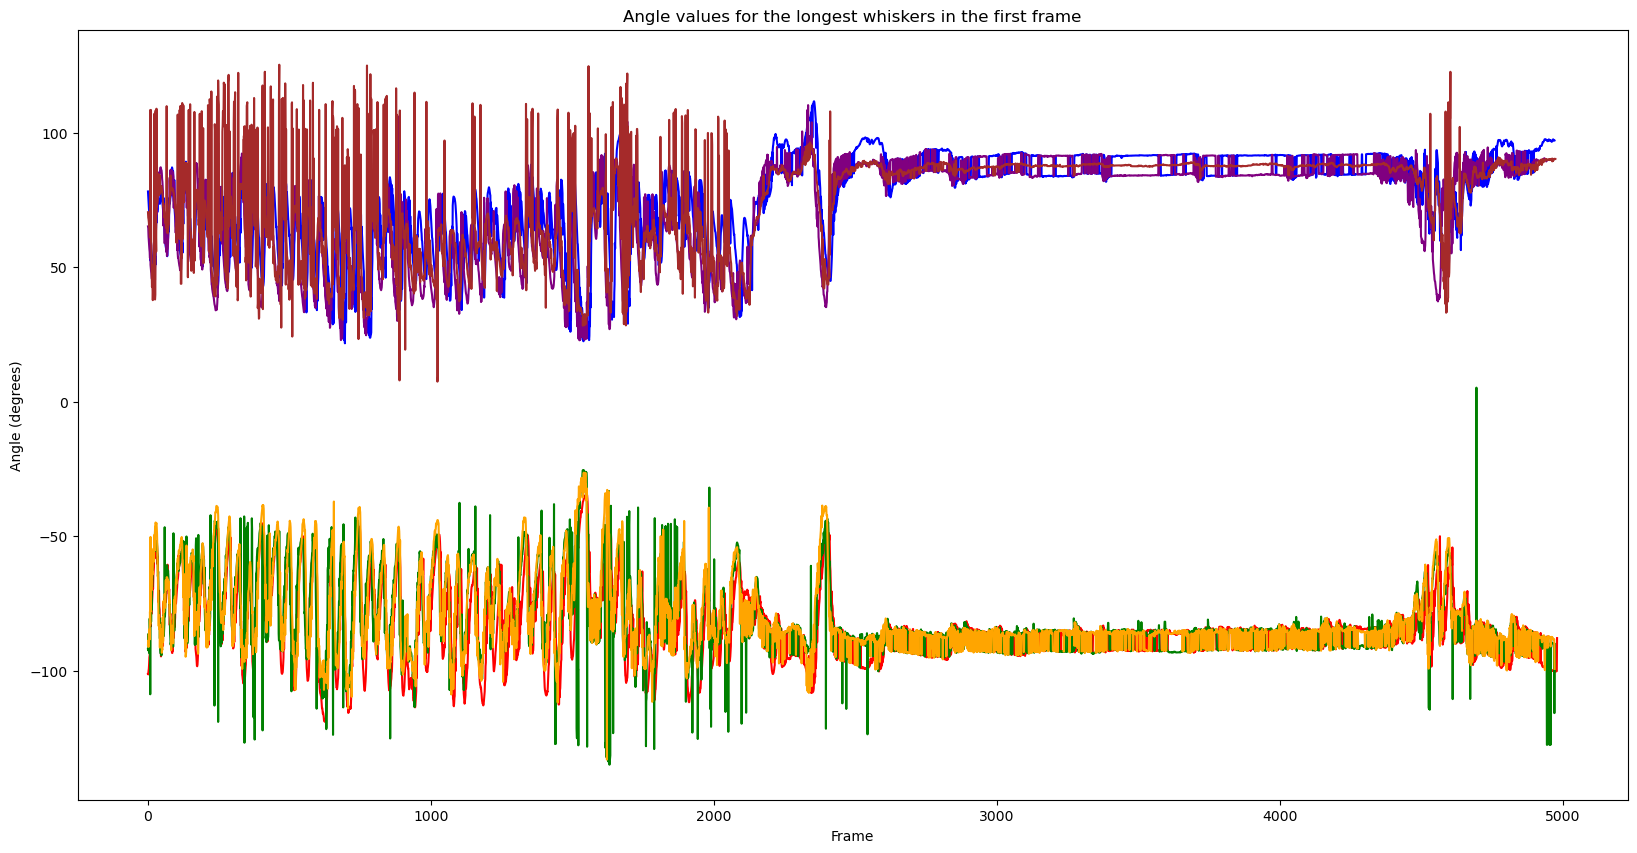

In [18]:
# Create set of colors for those whiskers
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plot the angle values for the longest whiskers, with different colors for each whisker
plt.figure(figsize=(20,10))
for i in range(len(l_angles)):
    plt.plot(l_angles[i], color=colors[i])
plt.xlabel('Time (frames)')
plt.ylabel('Angle (degrees)')
plt.title('Angle values for the longest whiskers')

In [19]:
# Release the resources
h5file.close()